# Logistic Regression
Models a categorical dependent variable based on one or more independent variables

In [1]:
# Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


In [2]:
# Load data
df = sns.load_dataset("diamonds")
df['is_ideal'] = np.where(df["cut"]=="Ideal", 1, 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,is_ideal
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [20]:
# Train Test Split
X = df[["x","y","z"]]
y = df["is_ideal"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [21]:
data = pd.concat([X, y], axis=1)

## Binomial Logistic Regression
Models the probability of an observation falling into one of two categories, based on one or more independent variables

In [22]:
clf = LogisticRegression().fit(X_train,y_train)

### Assumptions

**Linearity**

There should be a linear relationship between each dependent variable and the logit of the probability that the independent variable equals 1

In [25]:
train_pred = clf.predict_proba(X_train)
logit_data = X_train.copy()
logit_data["logit"] = [np.log(prob[1] / prob[0]) for prob in train_pred]

C:\Users\nan_z\AppData\Local\Temp\ipykernel_5792\3736578897.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  logit_data["logit"] = [np.log(prob[1] / prob[0]) for prob in train_pred]


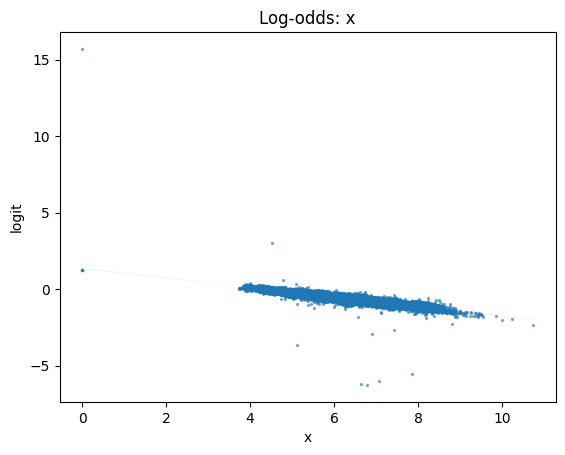

In [29]:
# Plot regplot of log-odds for each independent variable
sns.regplot(x='x', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: x');

**Independent Observations**

Determined by how the data was collected

**No Multicollinearity**

If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

In [31]:
data.corr(method="pearson")

,x,y,z,is_ideal
x,1.000000,0.974701,0.970772,-0.162674
y,0.974701,1.000000,0.952006,-0.153158
z,0.970772,0.952006,1.000000,-0.158688
is_ideal,-0.162674,-0.153158,-0.158688,1.000000


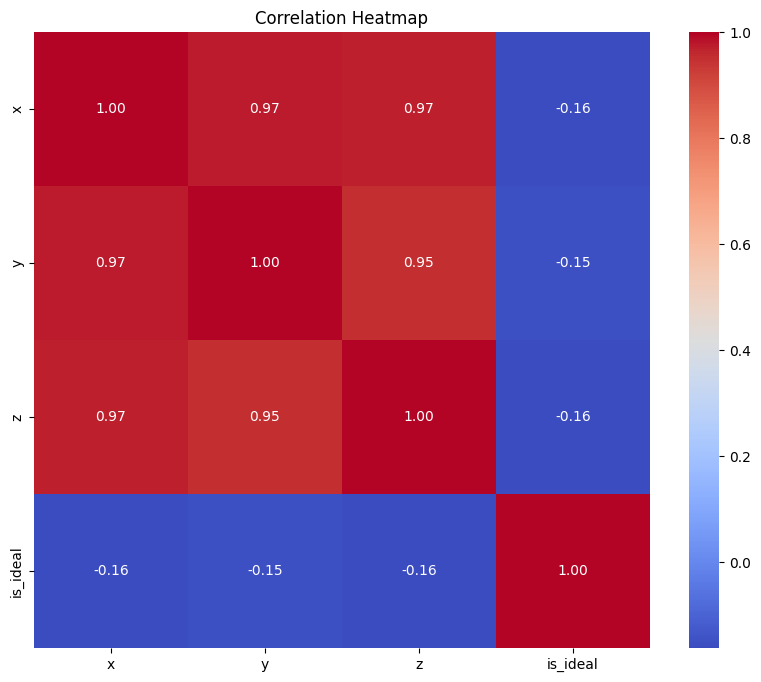

In [24]:
# Plot correlation heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method="pearson"), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

**No Extreme Outliers**

In [30]:
data.describe()

,x,y,z,is_ideal
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734,0.399537
std,1.121761,1.142135,0.705699,0.489808
min,0.000000,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000,0.000000
50%,5.700000,5.710000,3.530000,0.000000
75%,6.540000,6.540000,4.040000,1.000000
max,10.740000,58.900000,31.800000,1.000000


### Evaluation

In [32]:
# Print the coefficient
clf.coef_

array([[-2.39976116,  2.18472358, -0.12151887]])

In [34]:
# Print the intercept
clf.intercept_

array([1.23439589])

<Axes: xlabel='x', ylabel='is_ideal'>

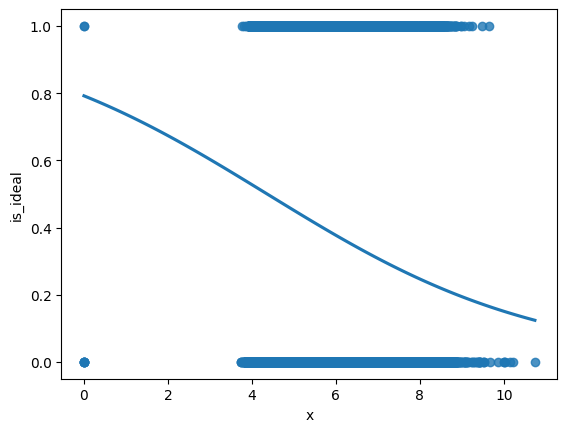

In [35]:
# Plot model
sns.regplot(x="x", y="is_ideal", data=data, logistic=True, ci=None)

In [36]:
# Save predictions
y_pred = clf.predict(X_test)

In [37]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([0.53645688, 0.40727195, 0.45230591, ..., 0.26984545, 0.447105  ,
       0.45221297])

In [38]:
# Use predict to output 0's and 1's.
clf.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

####  Confusion Matrix

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

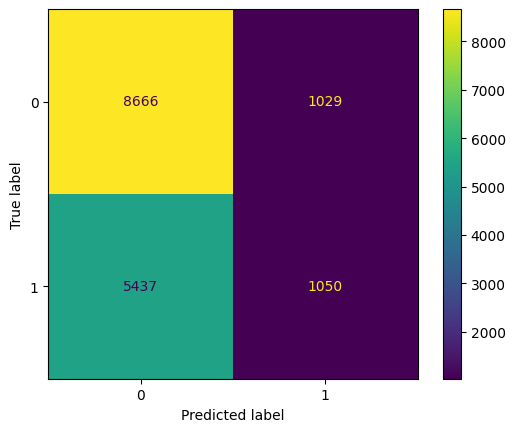

In [40]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

# Display the confusion matrix
disp.plot()

**Precision** = TP / (TP + FP)

The proportion of positive predictions that were true positives

In [41]:
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))

Precision: 0.505051


**Recall** = TP / (TP + FN)

The proportion of positives the model was able to identify correctly

In [42]:
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))

Recall: 0.161862


**Accuracy** = (TP + TN) / (TP + TN + FP + FN)

The proportion of data points that were correctly categorised

In [43]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.600420
F1 Score: 0.245155


#### ROC Curve and AUC
Balance of true positive rate and false positive rate at every threshold. The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.

#### Feature Importance

In [44]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('y', 2.1847235815187878),
 ('z', -0.1215188707605439),
 ('x', -2.399761163701979)]

Text(0.5, 1.0, 'Feature importance')

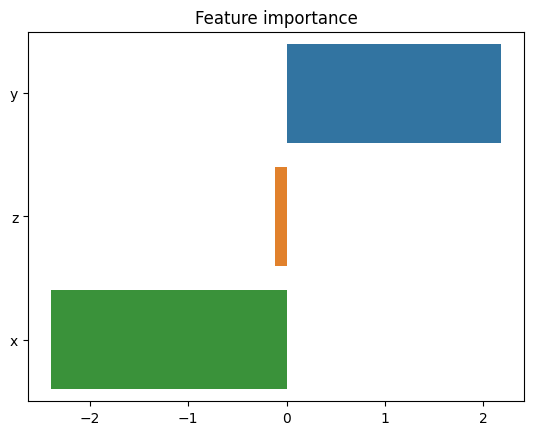

In [45]:
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')